In [1]:
#import libraries
from dtreeviz.trees import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import collections

import pydotplus

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from matplotlib import pyplot

In [2]:
#set column names, drug names and feature names in a list (to be referenced ahead)
column_names = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Neuroticism', 'Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness', 'Impulsiveness', 'Sensation_seeking', 'Alcohol', 'Amphetamine', 'Amyl_nitrite', 'Benzodiazepine', 'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legal_highs', 'LSD', 'Methadone', 'Mushrooms', 'Nicotine', 'Semeron', 'VSA']
dependent_features = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Neuroticism', 'Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness', 'Impulsiveness', 'Sensation_seeking']
drug_names = ['Alcohol', 'Amphetamine', 'Amyl_nitrite', 'Benzodiazepine', 'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legal_highs', 'LSD', 'Methadone', 'Mushrooms', 'Nicotine', 'Semeron', 'VSA']

In [3]:
#Loading the Dataset
drug_data = pd.read_csv('data/drug_consumption.data', header = None, names = column_names)
#Using ID Column as index as it does not have any relation with the features
drug_data.set_index('ID', inplace = True)
drug_data.head()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,...,Ecstasy,Heroin,Ketamine,Legal_highs,LSD,Methadone,Mushrooms,Nicotine,Semeron,VSA
ID,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [4]:
#Categorizing Participants as users and non-users on the basis of their Drug usage
#Assumptions: 
#1 - A person is a drug user if they used a drug in last decade, year, month, week or day

#0 - A person is a non-drug user if they never used a drug or used over a decade ago

def change(category):
    if ((category == 'CL6') or (category == 'CL5') or (category == 'CL4') or (category == 'CL2') or (category == 'CL3')):
        category = 1
    elif ((category == 'CL0') or (category == 'CL1')):
        category = 0
    return category

In [5]:
# Updating the dataset to categorize users and non-users of drugs

for column in drug_names:
    drug_data[column] = drug_data[column].map(change)

In [6]:
#Creating a new DataFrame of just independent variables (to be used for building models) 
feature_dataset = drug_data[dependent_features]
len(feature_dataset.index)

1885

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_feature_dataset = scaler.fit_transform(feature_dataset)
scaled_feature_dataset = pd.DataFrame(scaled_feature_dataset, columns = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Neuroticism', 'Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness', 'Impulsiveness', 'Sensation_seeking'])
scaled_feature_dataset.head()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsiveness,Sensation_seeking
0,0.527566,1.000531,-0.058331,0.864498,2.621090,0.313500,-0.576912,-0.585137,-0.919341,-0.006281,-0.235108,-1.222226
1,-0.128854,-0.999470,2.093200,0.864498,-0.043764,-0.679764,1.944499,1.441683,0.763361,-0.142775,-0.752976,-0.220519
2,0.527566,-0.999470,-0.058331,0.864498,-0.043764,-0.468308,0.807667,-0.850217,-1.625245,-1.016902,-1.453650,0.420129
3,-1.123504,1.000531,1.229126,0.864498,-0.043764,-0.149189,-0.808263,-0.018822,0.592338,0.586885,-1.453650,-1.222226
4,0.527566,1.000531,2.093200,0.864498,-0.043764,0.736994,-1.637850,-0.453034,-0.302329,1.310098,-0.235108,-0.220519


## Feature Selection for Cannabis- ANOVA F-Test

Feature Age: 270.136487
Feature Gender: 81.114769
Feature Education: 43.061725
Feature Country: 328.534896
Feature Ethnicity: 18.036250
Feature Neuroticism: 26.048962
Feature Extraversion: 2.013876
Feature Openness: 181.566792
Feature Agreeableness: 27.140010
Feature Conscientiousness: 125.051056
Feature Impulsiveness: 118.519149
Feature Sensation_seeking: 251.085937


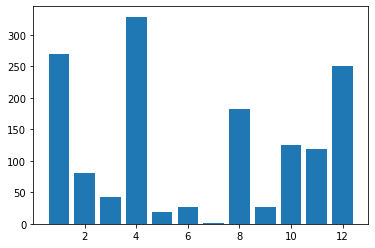

In [8]:
#Load Data in X and Y Dataframes
X_cannabis = scaled_feature_dataset
Y_cannabis = drug_data[["Cannabis"]]

#Perform Train-Test Split
X_cannabis_train, X_cannabis_test, y_cannabis_train, y_cannabis_test = train_test_split(X_cannabis , Y_cannabis, test_size = 0.33, random_state = 42)

# configuration for selecting all features
feature_selection_cannabis = SelectKBest(score_func=f_classif, k=6)
feature_selection_cannabis.fit(X_cannabis_train, y_cannabis_train.values.ravel())
X_cannabis_train_fs = feature_selection_cannabis.transform(X_cannabis_train)
X_cannabis_test_fs = feature_selection_cannabis.transform(X_cannabis_test)

for i in range(len(feature_selection_cannabis.scores_)):
    print('Feature %s: %f' % (dependent_features[i], feature_selection_cannabis.scores_[i]))
# plot the scores
plt.bar([i+1 for i in range(len(feature_selection_cannabis.scores_))], feature_selection_cannabis.scores_)
plt.show()

In [9]:
#Update the datasets after feature selection and performing train-test split
cannabis_features = ['Age', 'Gender', 'Country', 'Openness', 'Conscientiousness', 'Impulsiveness', 'Sensation_seeking']
X_cannabis = X_cannabis[cannabis_features]
Y_cannabis = drug_data[["Cannabis"]]
X_cannabis_train, X_cannabis_test, y_cannabis_train, y_cannabis_test = train_test_split(X_cannabis , Y_cannabis, test_size = 0.33, random_state = 42)
print("Training split input- ", X_cannabis_train.shape)
print("Testing split input- ", X_cannabis_test.shape)
collections.Counter(Y_cannabis)

Training split input-  (1262, 7)
Testing split input-  (623, 7)


Counter({'Cannabis': 1})

## Results Using Holdout Method (Most Accurate Model)

In [10]:
#Build Decision Tree Model
cannabis_DT_classifier=DecisionTreeClassifier(criterion='entropy', max_depth = 5, min_samples_leaf = 5)
cannabis_DT_classifier.fit(X_cannabis_train,y_cannabis_train)

# Predicting the values of test data
y_cannabis_DT_pred = cannabis_DT_classifier.predict(X_cannabis_test)
print("Classification report - \n", classification_report(y_cannabis_test,y_cannabis_DT_pred))
print("Precision: ",round(precision_score(y_cannabis_test, y_cannabis_DT_pred),2))
print("Recall: ",round(recall_score(y_cannabis_test, y_cannabis_DT_pred),2))

Classification report - 
               precision    recall  f1-score   support

           0       0.67      0.69      0.68       188
           1       0.87      0.86      0.86       435

    accuracy                           0.81       623
   macro avg       0.77      0.77      0.77       623
weighted avg       0.81      0.81      0.81       623

Precision:  0.87
Recall:  0.86


Text(0.5, 1.0, 'DT Accuracy Score: 0.8058')

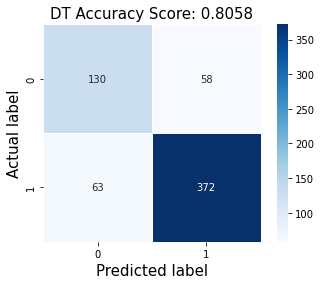

In [11]:
cannabis_DT_cm = confusion_matrix(y_cannabis_test, y_cannabis_DT_pred)
s= sns.heatmap(data=cannabis_DT_cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt='g')
s.set_xlabel('Predicted label',fontsize = 15)
s.set_ylabel('Actual label',fontsize = 15)
all_sample_title = 'DT Accuracy Score: {0:.4f}'.format(cannabis_DT_classifier.score(X_cannabis_test, y_cannabis_test))
s.set_title(all_sample_title, size = 15)

In [12]:
feature_names = X_cannabis.columns

### Using plot_tree approach to visualize tree

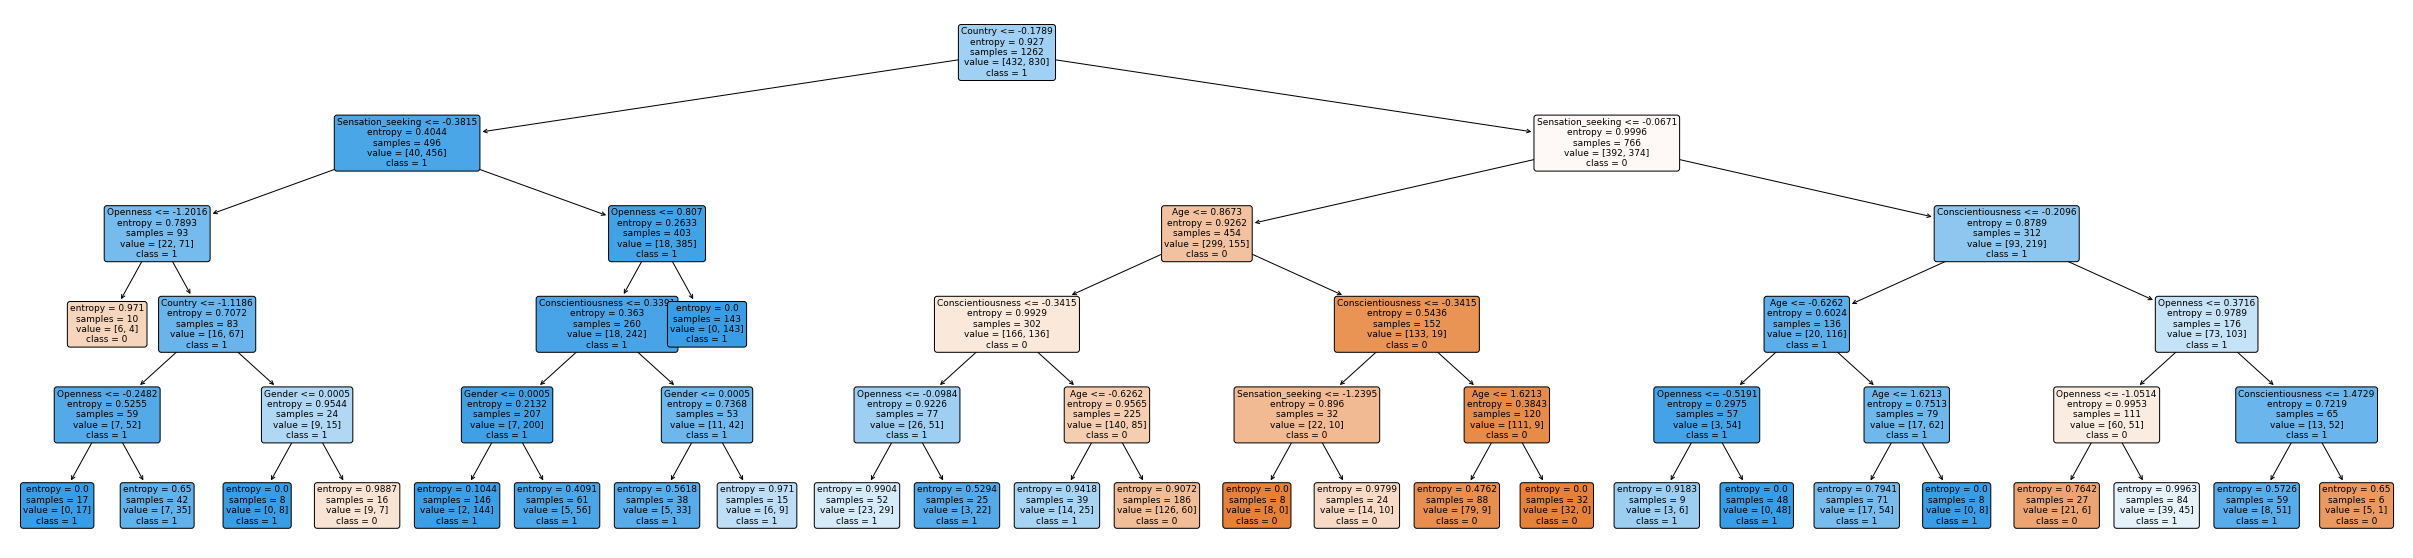

In [13]:
#Visualizing Tree
plt.figure(figsize = (43,10))
dec_tree = plot_tree(decision_tree=cannabis_DT_classifier, feature_names = X_cannabis.columns, 
                     class_names =["0", "1"] , filled = True , precision = 4, rounded = True, fontsize=9)
plt.savefig("Decision Tree Cannabis.jpeg", dpi=200)

### Using dtreeviz approach to visualize tree

/Users/shubhamkulkarni/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


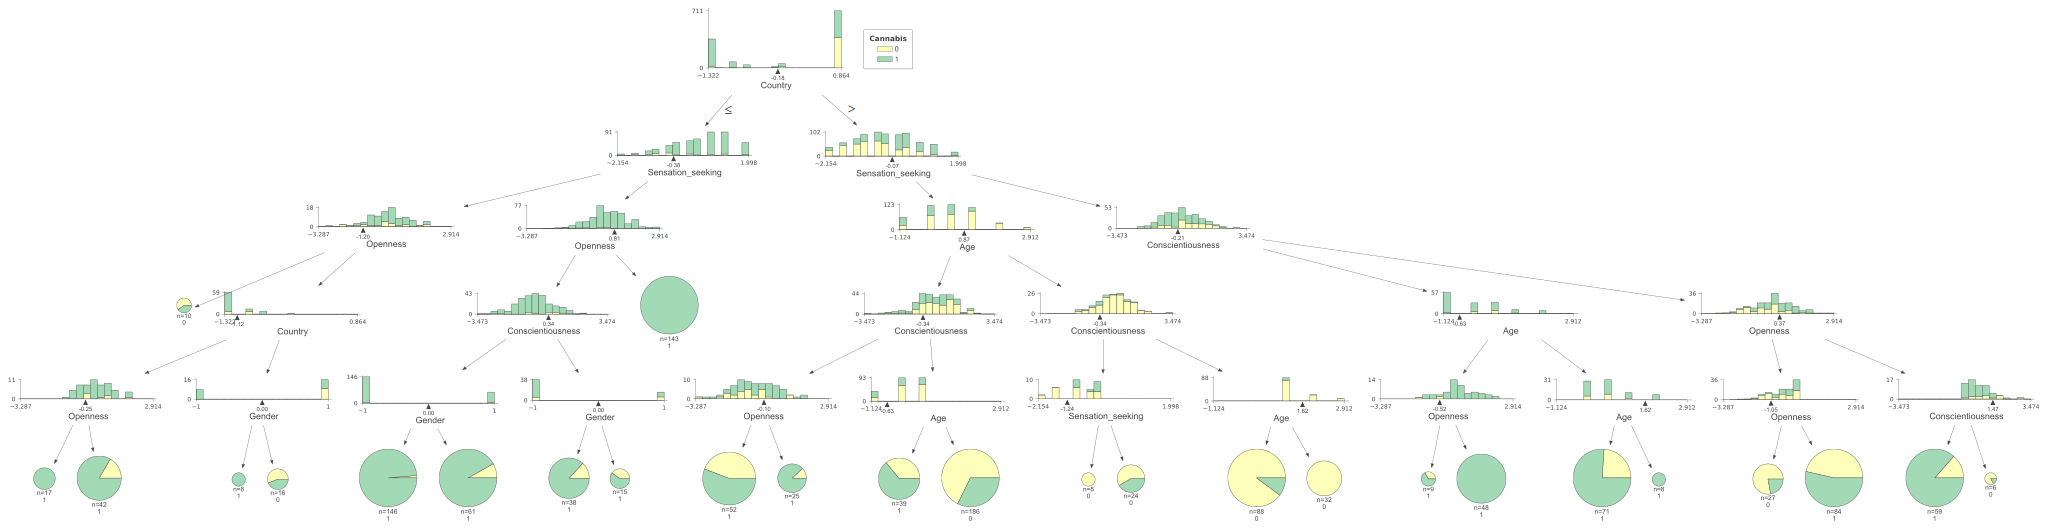

In [14]:
viz = dtreeviz(cannabis_DT_classifier, x_data=X_cannabis_train, y_data=y_cannabis_train["Cannabis"], 
               target_name='Cannabis', feature_names=X_cannabis.columns, class_names=["0","1"])
viz.save("dtree_holdout.svg")
viz


### Using graphviz approach to visualize tree

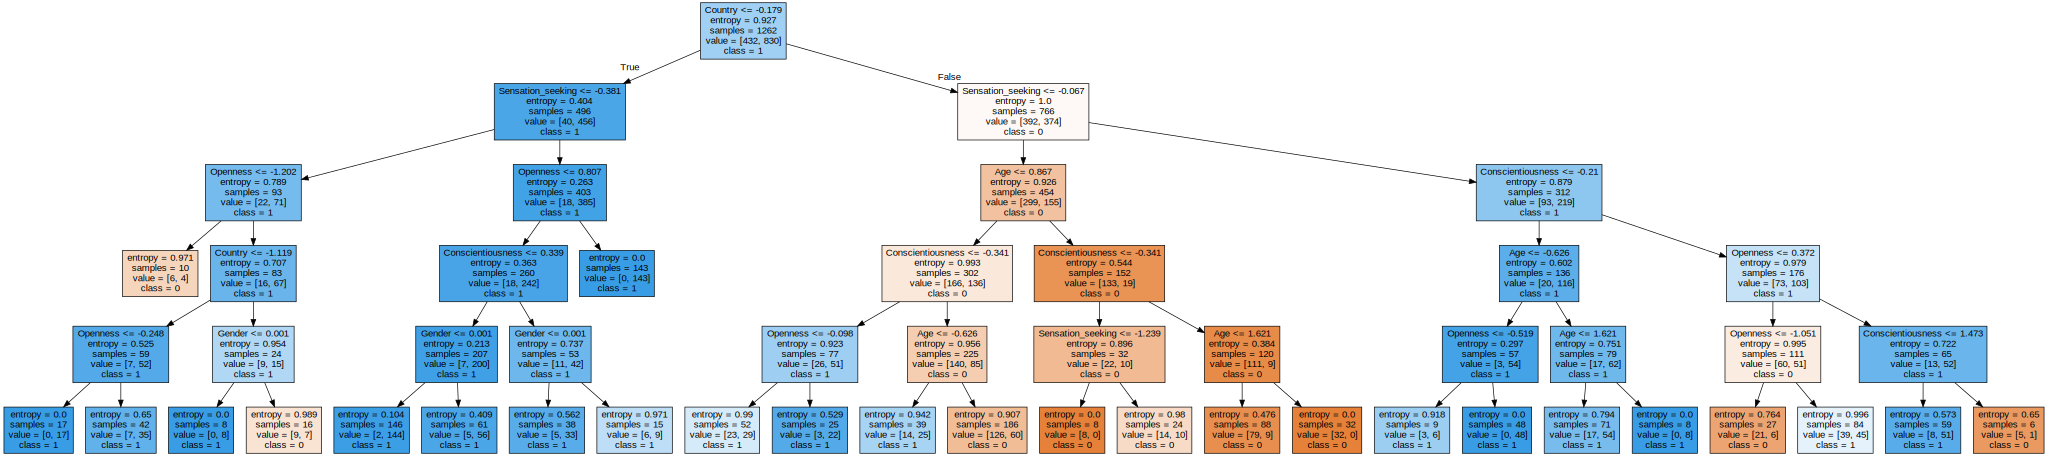

In [15]:
import graphviz
dot_data = tree.export_graphviz(cannabis_DT_classifier, out_file=None, 
                                feature_names=X_cannabis.columns, 
                                class_names=["0", "1"],
                                filled=True)
graphviz.Source(dot_data, format="png") 